In [1]:
import numpy as np
import pandas as pd
import pickle
import os, sys
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('/home/wonseok/2022_mimic_vital_instance_dp_synthesis')
from timeDP2.algorithm import original_timedp as odp
from timeDP2.algorithm import timedp_algorithm as tdp

# Data EDA
- original data distribution 
    - missingness check

In [2]:
PROJECT_DIR = Path().cwd().parent
DATA_DIR = PROJECT_DIR.joinpath('data/processed')

live = np.load(DATA_DIR.joinpath('live_numpy.npz'))['result']
death = np.load(DATA_DIR.joinpath('death_numpy.npz'))['result']

live.shape

(6, 4796, 24)

In [3]:
# live[0]
death[0]

array([[ 68.,  65.,  63., ...,  75.,  -1.,  74.],
       [ -1.,  -1.,  -1., ...,  98.,  93.,  75.],
       [122., 129., 130., ..., 148., 144., 147.],
       ...,
       [ 68.,  67.,  65., ...,  72.,  79.,  35.],
       [ 95.,  99., 107., ..., 109., 105., 104.],
       [ -1.,  78.,  77., ...,  -1.,  76.,  89.]], dtype=float32)

In [4]:
live[0]

array([[ 68.,  65.,  63., ...,  75.,  -1.,  74.],
       [ -1.,  -1.,  -1., ...,  98.,  93.,  75.],
       [122., 129., 130., ..., 148., 144., 147.],
       ...,
       [ 68.,  67.,  65., ...,  72.,  79.,  35.],
       [ 95.,  99., 107., ..., 109., 105., 104.],
       [ -1.,  78.,  77., ...,  -1.,  76.,  89.]], dtype=float32)

In [6]:
death = np.load('/home/wonseok/2022_mimic_vital_instance_dp_synthesis/data/processed/death_numpy.npz')['result']
live = np.load('/home/wonseok/2022_mimic_vital_instance_dp_synthesis/data/processed/live_numpy.npz')['result']


In [7]:
val = odp.timeseries_dp(live[0][2], 0.1)

[[-0.18751875]]


In [11]:
xs = [x for x in range(0,24)]

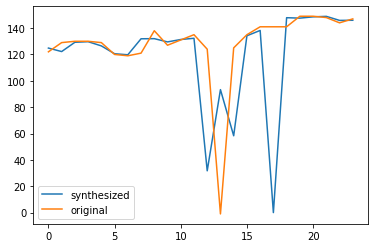

In [12]:
plt.plot(xs, val, label='synthesized')
plt.plot(xs, live[0][2], label ='original')
plt.legend()
plt.show()

In [13]:
DP_object = tdp.TimeDP(epsilon=0.1, delta =0.1, mechanism_type= 'bounded_laplace')
new_sample = tdp.Vector_creator(live[0][2], DP_object)

created boundary list and making new gradients..
creating boundary list


In [14]:
live[0][0]

array([68., 65., 63., 63., 66., 66., 65., 66., 66., 67., 66., 63., 64.,
       70., 71., 74., 74., 72., 74., 77., 87., 75., -1., 74.],
      dtype=float32)

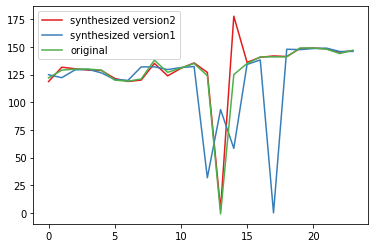

In [15]:
plt.plot(xs, new_sample.new_vector, label='synthesized version2', color ='#e41a1c')
plt.plot(xs, val, label='synthesized version1', color = '#377eb8')
plt.plot(xs, live[0][2], color='#4daf4a', label='original')
plt.legend()
plt.show()

## preprocess datasets
- change -1 values with linear interpolation

In [17]:
death

array([[[ 68. ,  65. ,  63. , ...,  75. ,  -1. ,  74. ],
        [ -1. ,  -1. ,  -1. , ...,  98. ,  93. ,  75. ],
        [122. , 129. , 130. , ..., 148. , 144. , 147. ],
        ...,
        [ 68. ,  67. ,  65. , ...,  72. ,  79. ,  35. ],
        [ 95. ,  99. , 107. , ..., 109. , 105. , 104. ],
        [ -1. ,  78. ,  77. , ...,  -1. ,  76. ,  89. ]],

       [[138. , 121. , 123. , ...,  -1. ,  -1. ,  86. ],
        [ -1. ,  -1. ,  -1. , ...,  -1. ,  -1. ,  -1. ],
        [ 75. ,  65. ,  79. , ...,  73. ,  58. ,  50. ],
        ...,
        [156. , 155. , 156. , ..., 143. , 126. ,  39. ],
        [134. , 127. , 134. , ..., 125. ,  -1. ,  -1. ],
        [ -1. , 122. , 108. , ...,  -1. , 111. ,  -1. ]],

       [[ 77. ,  73. ,  72. , ...,  -1. ,  -1. ,  48. ],
        [ -1. ,  -1. ,  -1. , ...,  -1. ,  -1. ,  -1. ],
        [ 51. ,  42. ,  64. , ...,  27. ,  36. ,  31. ],
        ...,
        [ 73. ,  72. ,  73. , ...,  61. ,  52. ,  26. ],
        [ 85. ,  71. ,  77. , ...,  59. ,  -1